In [77]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import requests
from io import StringIO
from datetime import datetime
import matplotlib.dates as mdates
from datetime import timedelta

In [64]:
%matplotlib inline

In [65]:
# data downloaded from http://www.healthdata.org/covid/data-downloads
# each available file was renamed to 'Hops_xx_yy.csv' where xx is month and yy is day it was published
data_path = './ihme_data/'
files = [x for n, d, f in os.walk(data_path) for x in f]

In [66]:
# make one big dataframe including the publish date
def make_df(filename):
    tdf = pd.read_csv(os.path.join(data_path, filename))
    d = '2020-' + filename[-9:-4].replace('_', '-')
    tdf['publish_date'] = pd.to_datetime(d)
    return tdf

df = pd.concat([make_df(f) for f in files])
df['date'] = pd.to_datetime(df.date)

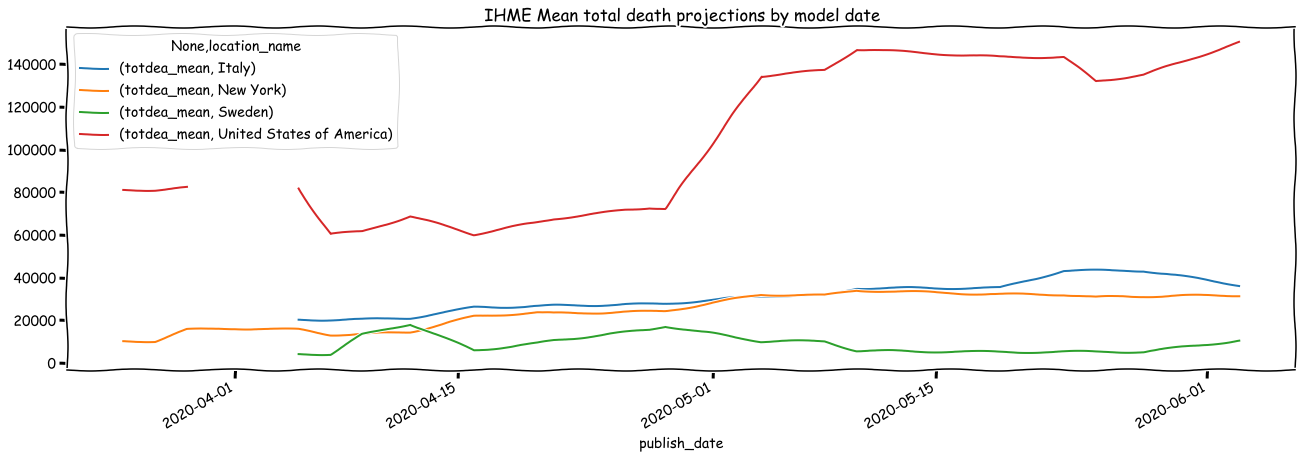

In [67]:
with plt.xkcd():
    plt.rcParams['figure.figsize'] = (22,7)
    df[df.location_name.isin(['Sweden', 'United States of America', 'New York', 'Italy'])].\
       groupby(['publish_date', 'location_name']).\
       agg({'totdea_mean': 'max'}).unstack().\
       plot(logy=False, title='IHME Mean total death projections by model date')


In [6]:
# let's make the real version of this graph https://www.realclearpolitics.com/articles/2020/05/21/how_fear_groupthink_drove_unnecessary_global_lockdowns_143253.html

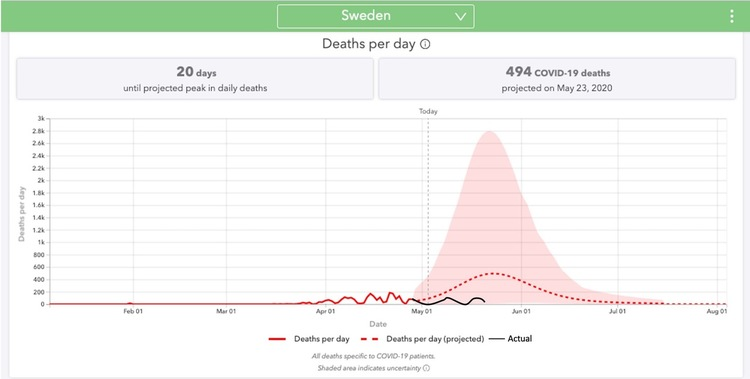

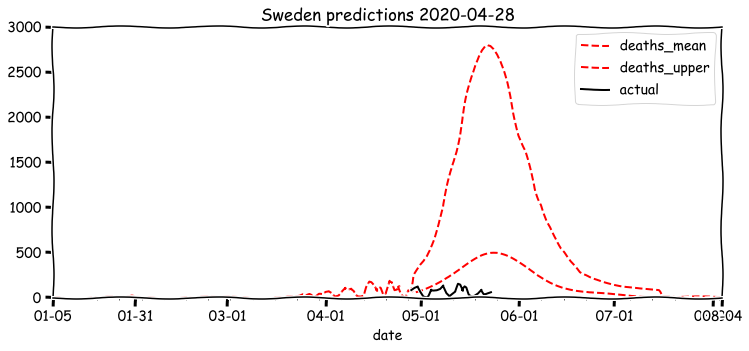

In [68]:
plt.rcParams['figure.figsize'] = (12,5)
with plt.xkcd():
    logy = False
    pred_date = '2020-04-28'
    latest_date = '2020-05-28'
    # predictions from a specific date
    ax = df.loc[
        (df.location_name=='Sweden')&(df.publish_date==pred_date),
        ['date', 'deaths_mean', 'deaths_upper']
    ].set_index('date').\
        plot(
            logy=logy,
            style=['r--','r--']
        )

    # now this is actual deaths from 5/25
    df.loc[
            (df.location_name=='Sweden')&(df.publish_date=='2020-05-25')&(df.deaths_lower==df.deaths_upper)&
            (df.date>=pd.Timestamp(pred_date))&(df.date<pd.Timestamp(latest_date)),
            ['date', 'deaths_upper']
    ].set_index('date').rename(columns={'deaths_upper': 'actual'}).\
        plot(ax=ax, logy=logy, style=['k'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.set_ylim(-10, 3000)
    ax.set_title(f'Sweden predictions {pred_date}')
    
    ax.fill_between(
        df[(df.location_name=='Sweden')&(df.publish_date==pred_date)].date,
        df[(df.location_name=='Sweden')&(df.publish_date==pred_date)].deaths_upper, 
        alpha=0.2, color='r')

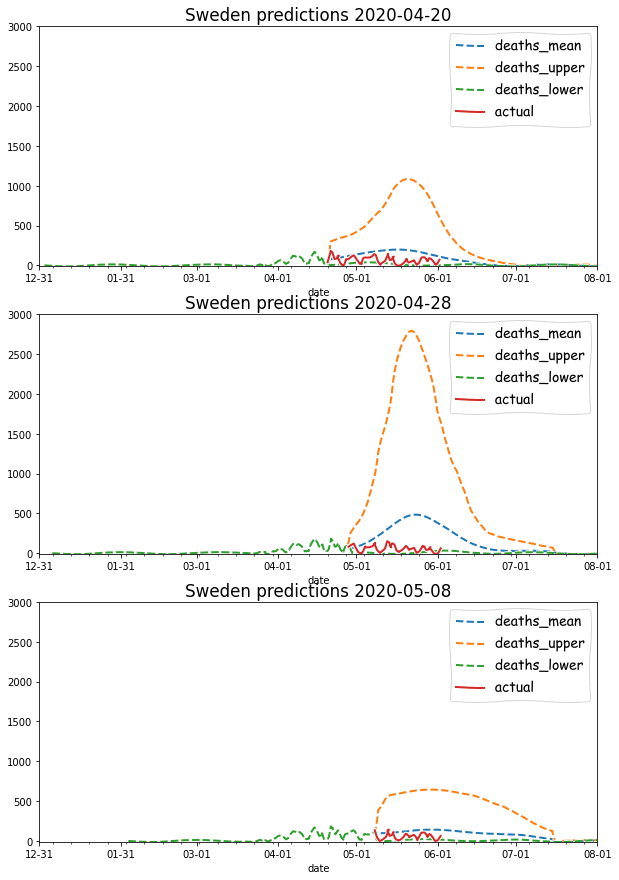

In [70]:
dates = ['2020-04-20', '2020-04-28', '2020-05-08']
latest_date = '2020-06-03'
country = 'Sweden'
fig, axs = plt.subplots(len(dates), figsize=(10, len(dates)*5))
logy = False
for (pred_date, ax) in zip(dates, axs):
    with plt.xkcd():
        # predictions from a specific date
        df.loc[
            (df.location_name==country)&(df.publish_date==pred_date),
            ['date', 'deaths_mean', 'deaths_upper', 'deaths_lower']
        ].set_index('date').\
            plot(
                logy=logy,
                style=['--','--','--'],
                ax=ax
            )

        # now this is actual deaths from pre_date through latest_date
        df.loc[
            (df.location_name==country)&(df.publish_date==latest_date)&(df.deaths_lower==df.deaths_upper)&
            (df.date>=pd.Timestamp(pred_date))&(df.date<pd.Timestamp(latest_date)),
            ['date', 'deaths_upper']
        ].set_index('date').rename(columns={'deaths_upper': 'actual'}).\
            plot(ax=ax, logy=logy)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        ax.set_ylim(-10, 3000)
        ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-08-01'))
        ax.set_title(f'{country} predictions {pred_date}')

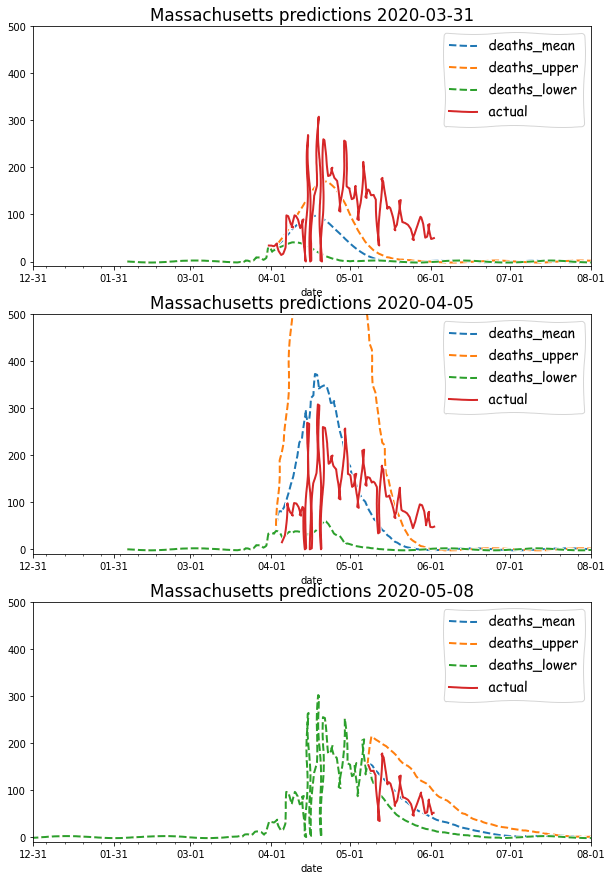

In [75]:
dates = ['2020-03-31','2020-04-05', '2020-05-08']
latest_date = '2020-06-03'
country = 'Massachusetts'
fig, axs = plt.subplots(len(dates), figsize=(10, len(dates)*5))
logy = False
for (pred_date, ax) in zip(dates, axs):
    with plt.xkcd():
        # predictions from a specific date
        df.loc[
            (df.location_name==country)&(df.publish_date==pred_date),
            ['date', 'deaths_mean', 'deaths_upper', 'deaths_lower']
        ].set_index('date').\
            plot(
                logy=logy,
                style=['--','--','--'],
                ax=ax
            )

        # now this is actual deaths from pre_date through latest_date
        df.loc[
            (df.location_name==country)&(df.publish_date==latest_date)&(df.deaths_lower==df.deaths_upper)&
            (df.date>=pd.Timestamp(pred_date))&(df.date<pd.Timestamp(latest_date)),
            ['date', 'deaths_upper']
        ].set_index('date').rename(columns={'deaths_upper': 'actual'}).\
            plot(ax=ax, logy=logy)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        ax.set_ylim(-10, 500)
        ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-08-01'))
        ax.set_title(f'{country} predictions {pred_date}')

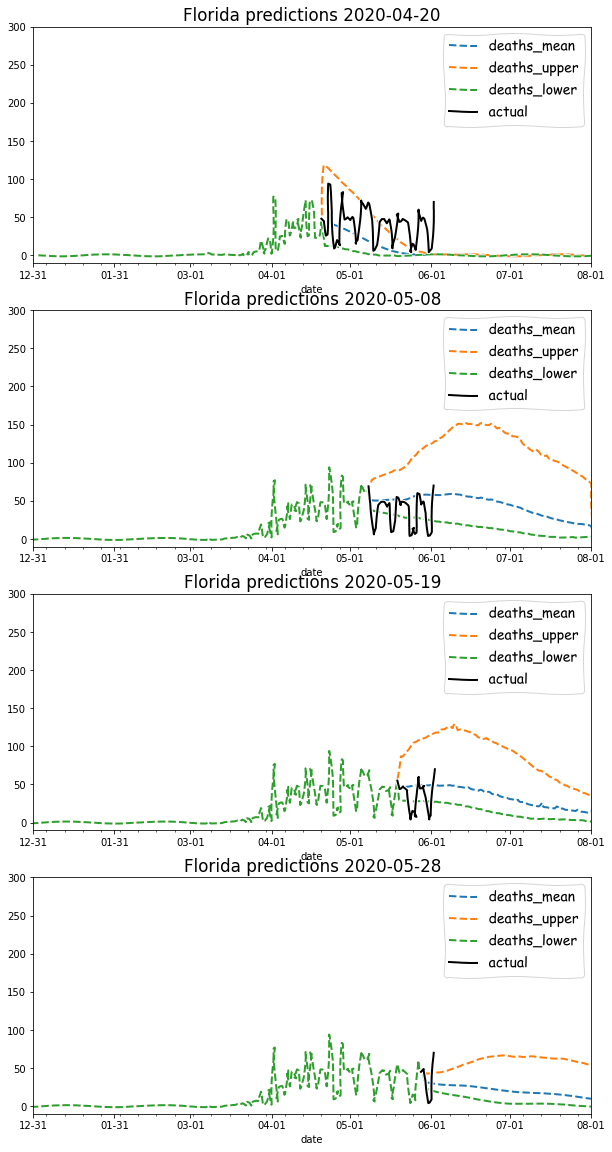

In [74]:
# what happened in Florida? 4 weeks ago someone used the chart to make a point, did it work?
# https://floridapolitics.com/archives/331753-peak-of-daily-covid-19-deaths-still-in-floridas-future-model-shows
dates = ['2020-04-20', '2020-05-08', '2020-05-19', '2020-05-28']
latest_date = '2020-06-03'
country = 'Florida'
fig, axs = plt.subplots(len(dates), figsize=(10, len(dates)*5))
logy = False
for (pred_date, ax) in zip(dates, axs):
    with plt.xkcd():
        # predictions from a specific date
        df.loc[
            (df.location_name==country)&(df.publish_date==pred_date),
            ['date', 'deaths_mean', 'deaths_upper', 'deaths_lower']
        ].set_index('date').\
            plot(
                logy=logy,
                style=['--','--','--'],
                ax=ax
            )

        # now this is actual deaths from pre_date through latest_date
        df.loc[
            (df.location_name==country)&(df.publish_date==latest_date)&(df.deaths_lower==df.deaths_upper)&
            (df.date>=pd.Timestamp(pred_date))&(df.date<pd.Timestamp(latest_date)),
            ['date', 'deaths_upper']
        ].set_index('date').rename(columns={'deaths_upper': 'actual'}).\
            plot(ax=ax, logy=logy, style=['k'])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
        ax.set_ylim(-10, 300)
        ax.set_xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-08-01'))
        ax.set_title(f'{country} predictions {pred_date}')

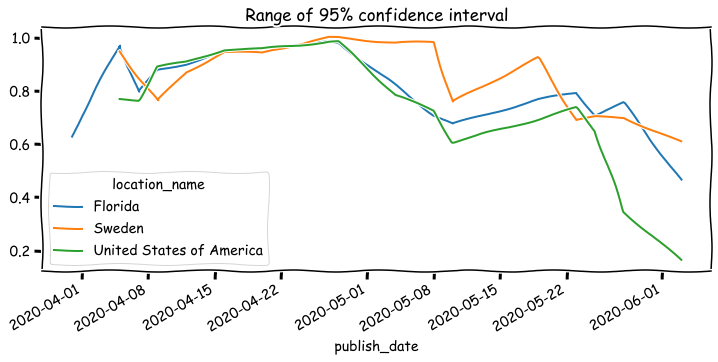

In [78]:
# can we look at the uncertainty in a model for any given country by looking at the 95ci?
countries=['Sweden', 'United States of America', 'Florida']
delta = df.loc[(df.location_name.isin(countries))&(df.date==df.publish_date+timedelta(days=14))].\
    groupby(['location_name', 'publish_date']).\
    agg({'deaths_upper': 'max', 'deaths_lower': 'max'})
delta['range'] = delta.deaths_upper - delta.deaths_lower
delta['ci_ratio'] = delta.range / delta.deaths_upper
with plt.xkcd():
    delta.unstack(0).ci_ratio.plot(title=f'Range of 95% confidence interval')